# Build basic 2-Layer MLP to solve the xor-Problem

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [45]:
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=.1
                  ,centers= [(1,1), (1,0), (0,0),(0,1)])

In [46]:
#make blobs into binary problem
y[y==2]=0
y[y==3]=1

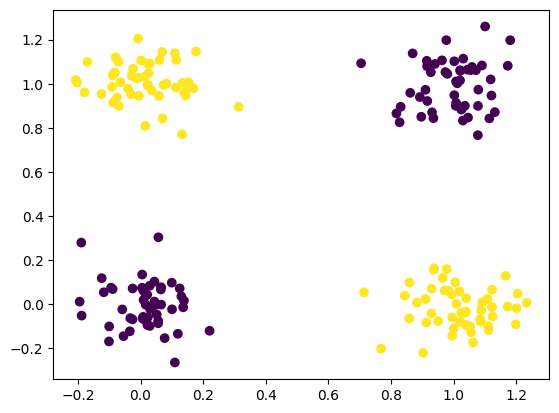

In [47]:
plt.scatter(X[:,0],X[:,1],c=y)

## Steps:
* build train and test sets
* write MLP class in Pytorch with two layers with adjustable number of perceptrons
* use nn.linear and nn.Sigmoid() units
* train your model
* test your model

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


x_train = torch.FloatTensor(X_train)
x_test = torch.FloatTensor(X_test)
Y_train = torch.FloatTensor(y_train)
Y_test = torch.FloatTensor(y_test)

In [49]:
import torch
class Perceptron(torch.nn.Module): #all nets inherit from nn.Module
    def __init__(self): #define layer types
        super(Perceptron, self).__init__()
        self.fc = torch.nn.Linear(2,1,bias=False) # Perceptron is single neuron "fully connected" (fc) -> linear unit with 2 inputs and 1 output
        self.non_linear = torch.nn.Sigmoid() #non-linear activation
    def forward(self, x): #build network
        output = self.fc(x) #w*X
        output = self.non_linear(output) # activation
        return output

In [50]:
model1 = Perceptron()
criterion1 = torch.nn.BCELoss()
optimizer1 = torch.optim.SGD(model1.parameters(), lr = 0.01)

In [51]:
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(hidden_layer_sizes=(6,5),random_state=5,verbose=True,learning_rate_init=0.01)

clf.fit(X_train,y_train)

Iteration 1, loss = 0.71817522
Iteration 2, loss = 0.70824650
Iteration 3, loss = 0.69942864
Iteration 4, loss = 0.69245029
Iteration 5, loss = 0.68745872
Iteration 6, loss = 0.68311229
Iteration 7, loss = 0.67869730
Iteration 8, loss = 0.67397540
Iteration 9, loss = 0.66901886
Iteration 10, loss = 0.66393230
Iteration 11, loss = 0.65888622
Iteration 12, loss = 0.65400986
Iteration 13, loss = 0.64940385
Iteration 14, loss = 0.64505761
Iteration 15, loss = 0.64074870
Iteration 16, loss = 0.63616240
Iteration 17, loss = 0.63131267
Iteration 18, loss = 0.62607970
Iteration 19, loss = 0.62052578
Iteration 20, loss = 0.61471596
Iteration 21, loss = 0.60876686
Iteration 22, loss = 0.60279256
Iteration 23, loss = 0.59683684
Iteration 24, loss = 0.59106006
Iteration 25, loss = 0.58564723
Iteration 26, loss = 0.58020066
Iteration 27, loss = 0.57476637
Iteration 28, loss = 0.56927921
Iteration 29, loss = 0.56367033
Iteration 30, loss = 0.55795940
Iteration 31, loss = 0.55216837
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [52]:
ypred=clf.predict(X_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

1.0